# Project 4

### Max Brehmer & Joakim Andersson Svendsen

For this project we chose to work with the `ARCENE` dataset from the UCI Machine Learning Repository. It was donated on $2/28/2008$.

ARCENE's task is to distinguish cancer versus normal patterns from mass-spectrometric data. This is a two-class classification problem with continuous input variables. This dataset is one of 5 datasets of the NIPS 2003 feature selection challenge.

What characterizes this dataset is that it has a large number of features ($10 000$) compared to the number of instances ($900$), of which $3000$ of the features are probes which have no predictive power. 

Training, validation and test sets are split into the following structure:

ARCENE          -- Positive ex. -- Negative ex. -- Total \
Training set    -- 44           -- 56           -- 100 \
Validation set  -- 44           -- 56           -- 100 \
Test set        -- 310          -- 390          -- 700 \
All             -- 398          -- 502          -- 900

In [109]:
import pandas as pd

train_data = pd.read_csv('../arcene/ARCENE/arcene_train.data', sep=' ', header=None)
train_labels = pd.read_csv('../arcene/ARCENE/arcene_train.labels', header=None)
test_data = pd.read_csv('../arcene/ARCENE/arcene_test.data', sep=' ', header=None)
valid_data = pd.read_csv('../arcene/ARCENE/arcene_valid.data', sep=' ', header=None)
valid_labels = pd.read_csv('../arcene/arcene_valid.labels', header=None)

The goal of this project is to perform a two-way classification of the ARCENE dataset into cancerous and non-cancerous cases. 
We plan on using a Convolutional Neural Network (CNN) approach since it has not been tested for the ARCENE data in the original data description. We want to compare the error rate using a CNN against other benchmark models. We have many features which may imply that the data behaves similarly to image classification where CNN's are the standard approach.

In [110]:
# Remove column 10000 as it is empty
def remove_empty_columns(data):
    for column in data.columns:
        if data[column].isnull().all():
            data.drop(columns=[column], inplace=True)

remove_empty_columns(train_data)
remove_empty_columns(valid_data)
remove_empty_columns(test_data)

In [ ]:
import setuptools.dist
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import numpy as np

"""
    Reshape data
"""

# Convert labels from {-1, 1} to {0, 1}
train_labels = (train_labels + 1) // 2
valid_labels = (valid_labels + 1) // 2

# One-hot encode the labels
train_labels_onehot = to_categorical(train_labels, num_classes=2)
valid_labels_onehot = to_categorical(valid_labels, num_classes=2)

# Normalize datasets
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
valid_data = scaler.transform(valid_data)
test_data = scaler.transform(test_data)

# Reshape the data to 2D
train_data_2d = train_data.reshape((-1, 100, 100, 1))
valid_data_2d = valid_data.reshape((-1, 100, 100, 1))
test_data_2d = test_data.reshape((-1, 100, 100, 1))

array([[[[0.        ],
         [0.32568807],
         [0.        ],
         ...,
         [0.1816092 ],
         [0.03603604],
         [0.        ]],

        [[0.63076923],
         [0.48675497],
         [0.13166144],
         ...,
         [0.35321101],
         [0.37254902],
         [0.26086957]],

        [[0.        ],
         [0.00612557],
         [0.        ],
         ...,
         [0.54266212],
         [0.13812155],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.46534653]],

        [[0.49115044],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.25773196]],

        [[0.        ],
         [0.32258065],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.98311445]]],


       [[[0.        ],
         [0.18807339],
         [0.34

In [122]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

"""
    Create model
"""

model = models.Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)), 
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Fully connected layer
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/Users/maxbrehmer/Deep_Learning/deep_learning_pr4/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,025 (16.61 MB)

 Trainable params: 4,352,833 (16.60 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step - accuracy: 0.4857 - loss: 23.7750 - val_accuracy: 0.5600 - val_loss: 0.7518
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step - accuracy: 0.5625 - loss: 6.8670 - val_accuracy: 0.5600 - val_loss: 0.6844
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 374ms/step - accuracy: 0.4913 - loss: 2.1080 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - accuracy: 0.4993 - loss: 0.9554 - val_accuracy: 0.4700 - val_loss: 0.6924
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 403ms/step - accuracy: 0.5108 - loss: 0.6793 - val_accuracy: 0.6200 - val_loss: 0.7846
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.5753 - loss: 0.6772 - val_accuracy: 0.5500 - val_loss: 1.5393
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.6083 - loss: 0.6752 - val_accuracy: 0.5700 - val_loss: 2.9723
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step - accuracy: 0.6260 - loss: 0.6752 - val_accuracy: 0.5700 - val_loss

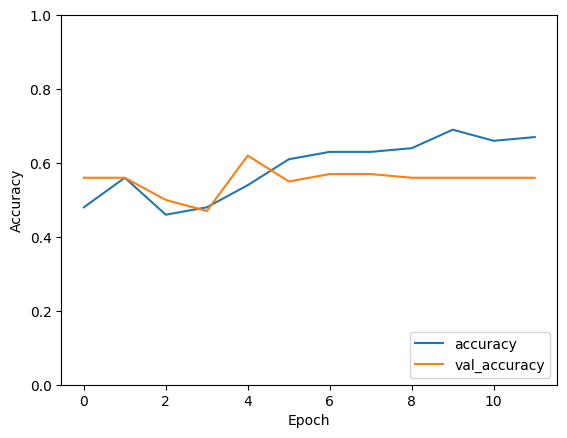

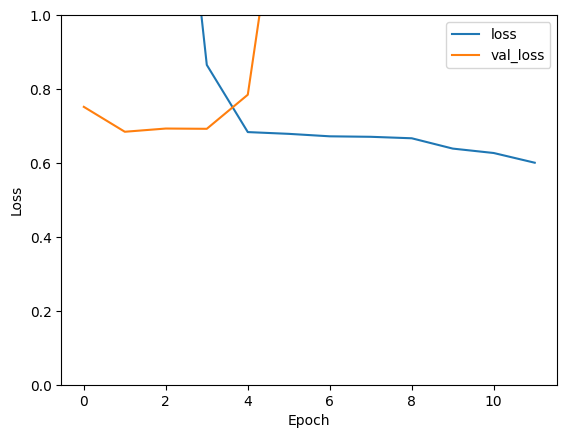

In [123]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

"""
    Train model
"""

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(train_data_2d, train_labels, epochs=50, batch_size=32,
                     validation_data=(valid_data_2d, valid_labels), callbacks=[early_stop])

val_loss, val_acc = model.evaluate(valid_data_2d, valid_labels)
print(f"Validation Accuracy: {val_acc:.2f}")
print(f"Validation Loss: {val_loss:.2f}")

"""
    Evaluate model
"""

# plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# plot loss curves
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()
